In [1]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

from data import get_data, meta
from plots import *

In [2]:
sns.set()

In [6]:
fig_folder = 'plots/physical_props'
data = get_data()

In [4]:
desc =  data.groupby('litologia').describe().round(2)

display(multi_table([
    desc['p_esp_seco'][['count', 'min', 'max', 'mean', 'std']],
    desc['p_esp_sat'][['count', 'min', 'max', 'mean', 'std']],
    desc['porosidade_efetiva'][['count', 'min', 'max', 'mean', 'std']]
]))

,count,min,max,mean,std
litologia,,,,,
Basalto Maciço,25.0,25.30,29.01,27.42,0.93
Basalto Vesiculado,4.0,21.30,25.55,23.43,2.15
Basalto Brechado,2.0,21.00,23.93,22.46,2.07
Basalto Hidrotermal,1.0,24.69,24.69,24.69,NaN
Peperito,4.0,21.33,24.70,22.61,1.46
Riolito,1.0,25.19,25.19,25.19,NaN
Arenito,1.0,19.82,19.82,19.82,NaN
,count,min,max,mean,std
litologia,,,,,


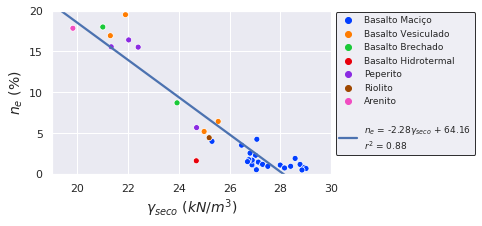

In [7]:
figure,  ax = plt.subplots(1, 1, figsize=(5, 3))

x, y = 'p_esp_seco', 'porosidade_efetiva'

sns.scatterplot(x=x, y=y, hue='litologia', data=data, palette='bright', ax=ax)

result = ols(formula='%s ~ %s' % (y, x), data=data).fit()
label = '$%s$ = %.2f$%s$ + %.2f \n$r^2$ = %.2f' % (meta[y]['symbol'], result.params[1], meta[x]['symbol'], result.params[0], result.rsquared)
sns.regplot(x=x, y=y, data=data, scatter=False, ci=False, ax=ax, label=label)
format_ax(x, y, ax)

handles, labels = ax.get_legend_handles_labels()
handles = [*handles[2:], handles[1], handles[0]]
labels = [*labels[2:], '', labels[0]]
ax.legend(handles=handles, labels=labels, prop={'size': 9}, frameon=True, edgecolor='black', bbox_to_anchor=(1, 1.02), loc=2)

plt.savefig('%s/%s_x_%s.png' % (fig_folder, x, y), bbox_inches='tight', dpi=130)
plt.show()

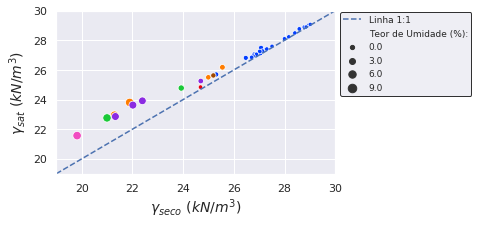

In [12]:
figure,  ax = plt.subplots(1, 1, figsize=(5, 3))

x, y = 'p_esp_seco', 'p_esp_sat'
sns.scatterplot(x=x, y=y, hue='litologia', size='teor_umidade', data=data, ax=ax, palette='bright')
ax.plot([19, 30], [19, 30], '--b', label='Linha 1:1')
format_ax(x, y, ax)
ax.set_xlim([19, 30])
ax.set_ylim([19, 30])

handles, labels = ax.get_legend_handles_labels()
handles = [handles[0], *handles[-5:]]
labels = [labels[0], *labels[-5:]]
labels[1] = 'Teor de Umidade (%):'
ax.legend(handles=handles, labels=labels, prop={'size': 9}, frameon=True, edgecolor='black', bbox_to_anchor=(1, 1.02), loc=2)

plt.savefig('%s/%s_x_%s.png' % (fig_folder, x, y), bbox_inches='tight', dpi=140)
plt.show()